In [62]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp
from scipy.integrate import quad
import sympy as sp

# Laboratorio 07: Ecuaciones Diferenciales.

---
### Profesores: Juan Marcos Marín Ramírez, Daniel Ruiz Mejía
### Nombre: Miguel Angel Perdomo Gaitan
*Métodos computacionales 2025-I*

---

# 1.

En una cadena de desintegración radiactiva, el elemento $A$ se desintegra en el elemento $B$, que a su vez se desintegra en $C$, y así sucesivamente hasta que la cadena de desintegración alcanza un elemento estable. Un ejemplo de tal cadena es $^{90}Sr$, que se desintegra en $^{90}Y$, que a su vez se desintegra a a $^{90}Zr$. La vida media de $^{90}Sr$ es de 28.78 años, y la vida media de $^{90}Y$ es de 2.67 días. $^{90}Zr$ es estable. Esta cadena de desintegración puede describirse mediante las siguientes ecuaciones diferenciales:

$$
\frac{dN_{Sr}}{dt} = -\lambda_{Sr}N_{Sr}
$$

$$
\frac{dN_{Y}}{dt} = -\lambda_{Y}N_{Y} - \frac{dN_{Sr}}{dt}
$$

Grafique la actividad relativa de una muestra de $^{90}Sr$ y otra gráfica de $^{90}Y$ en función del tiempo utlizando el método de Euler. (Una escala de tiempo logarítmica será útil).

**Nota:** Recuerde que $\lambda=\frac{\ln{2}}{t_{1/2}}$ con $t_{1/2}$ el tiempo de vida media.

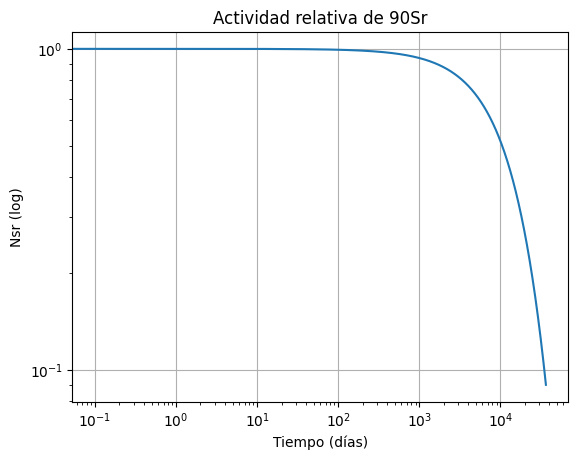

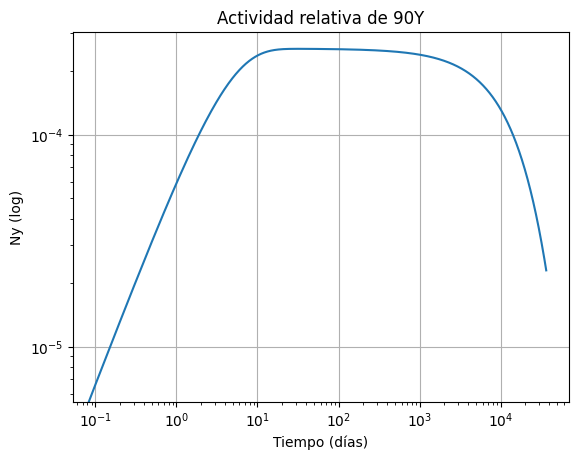

In [2]:

# Constants
t_half_Sr = 28.78 * 365  # convertir años en días
t_half_Y = 2.67          # days

lambda_Sr = np.log(2) / t_half_Sr
lambda_Y = np.log(2) / t_half_Y

# Euler parameters
dt = 0.1  # Pasos en días
t_max = 36500  # Simulación de 100 años
n_steps = int(t_max / dt)

#Se crean arrays para aplicar el método de Euler
t = np.linspace(0, t_max, n_steps)
Nsr = np.zeros(n_steps)
Ny = np.zeros(n_steps)

# Condiciones Iniciales
Nsr[0] = 1.0  
Ny[0] = 0.0

# Integración empleando el método de Euler
for i in range(n_steps - 1):
    dNsr = -lambda_Sr * Nsr[i]
    Nsr[i+1] = Nsr[i] + dNsr * dt
    
    dNy = -lambda_Y * Ny[i] - dNsr
    Ny[i+1] = Ny[i] + dNy * dt

# gráfica del decaimiento del Sr 
plt.figure()
plt.plot(t, Nsr)
plt.yscale('log')
plt.xscale('log')
plt.title('Actividad relativa de 90Sr')
plt.xlabel('Tiempo (días)')
plt.ylabel('Nsr (log)')
plt.grid()

#gráfica del decaimiento del Y
plt.figure()
plt.plot(t, Ny)
plt.yscale('log')
plt.xscale('log')
plt.title('Actividad relativa de 90Y')
plt.xlabel('Tiempo (días)')
plt.ylabel('Ny (log)')
plt.grid()

plt.show()


# 2.

Este circuito actúa como un filtro pasabajas: envías una señal por la izquierda y sale alterada por la derecha.

<center>

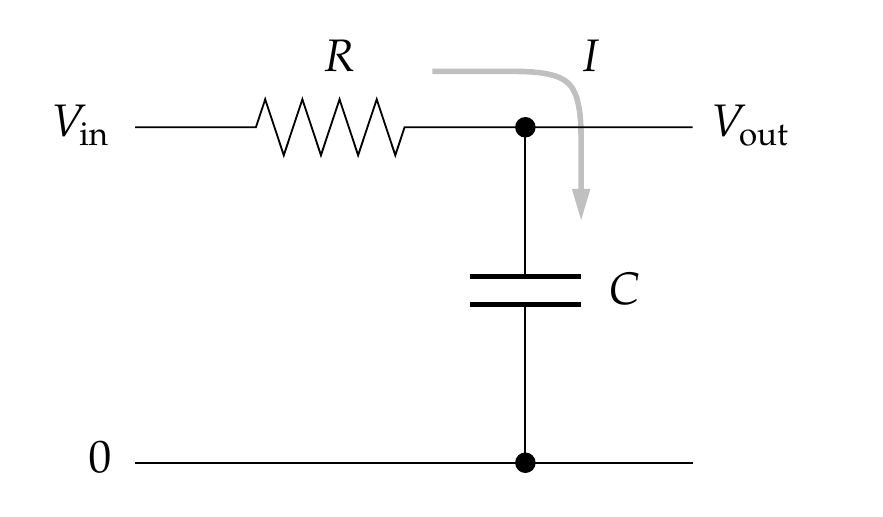

</center>

Usando la ley de Ohm y la ley del capacitor, y asumiendo que la impedancia de la carga de salida es muy alta, de modo que fluye una cantidad despreciable de corriente a través de ella, podemos escribir las ecuaciones que gobiernan este circuito de la siguiente manera. Sea $I$ la corriente que fluye a través de $R$ y hacia el capacitor, y sea $Q$ la carga en el capacitor. Entonces:

$$IR = V_{in} - V_{out}, \quad Q = CV_{out}, \quad I = \frac{dQ}{dt} $$

Sustituyendo la segunda ecuación en la tercera, y luego sustituyendo el resultado en la primera ecuación, encontramos que $ V_{\text{in}} - V_{\text{out}} = RC \left( \frac{dV_{\text{out}}}{dt} \right)$ , o equivalentemente

$$\frac{dV_{\text{out}}}{dt} = \frac{1}{RC} \left( V_{\text{in}} - V_{\text{out}} \right).$$

Escriba un programa para resolver esta ecuación para $V_{\text{out}}(t) $ usando el método de Runge-Kutta de cuarto orden cuando la señal de entrada es una onda cuadrada con frecuencia 1 y amplitud 1:

$$V_{\text{in}}(t) =
\begin{cases}
1 & \text{si } \lfloor 2t \rfloor \text{ es par}, \\
-1 & \text{si } \lfloor 2t \rfloor \text{ es impar},
\end{cases}$$

donde $\lfloor x \rfloor$ significa $x$ redondeado hacia abajo al siguiente entero más bajo. Grafique la salida del circuito filtro desde $t=0$ hasta $t=10$ cuando $RC=0.01, 0.1$ y $1$, con la condición inicial $V_{\text{out}}(0) = 0 $.

In [3]:
#se define la función para entregarla a solve_ivp
def circuito(t,y,constantes):
    """
    Función que implementa la ecuación diferencial del ejercicio
    Entradas:
        t: tiempo -> float
        y: array de condiciones iniciales -> array
            de la forma y=[v_out] = [y1]
        constantes: constantes del sistema -> array
    Salidas:
        y2: razón de cambio del voltaje de salida -> lista
    """
    #se declara una variable para R*C
    R_C=constantes
    #se hace una función por partes de Vin(t) y a partir de ello se implementa la ecuación diferencial
    if np.floor(2*t)%2==0:
        v_int=1
        y1=y[0]
        y2=1/(R_C)*(v_int-y1)
    else:
        v_int=-1
        y1=y[0]
        y2=1/(R_C)*(v_int-y1)
    return [y2]


In [4]:
#se soluciona la ecuación diferencial para distintos RC
y0=np.array([0])
constantes=np.array([0.01])
t_eval=np.linspace(0,10,1000)
sol=solve_ivp(circuito,(0,10),y0,t_eval=t_eval,args=constantes )
#para RC=0.1 
constantes_2=np.array([0.1])
sol_2=solve_ivp(circuito,(0,10), y0, t_eval=t_eval,args=constantes_2)
#para RC=1
constantes_3=np.array([1])
sol_3=solve_ivp(circuito,(0,10),y0, t_eval=t_eval, args=constantes_3)

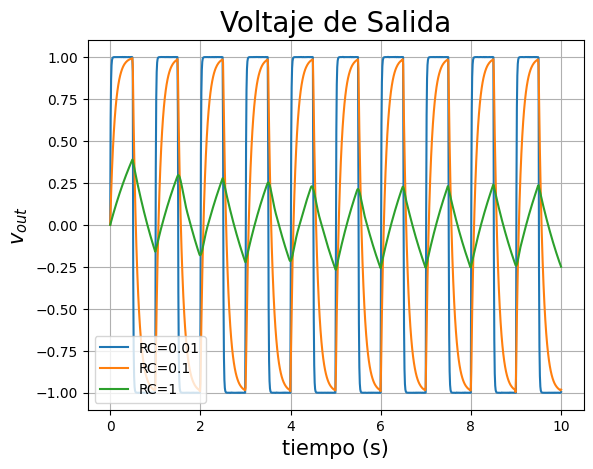

In [5]:
#se realiza la gráfica
plt.plot(t_eval, sol.y[0], label="RC=0.01")
plt.plot(t_eval,sol_2.y[0], label="RC=0.1")
plt.plot(t_eval,sol_3.y[0], label="RC=1" )
plt.grid()
plt.legend()
plt.title("Voltaje de Salida", fontsize=20)
plt.ylabel("$v_{out}$", fontsize=15)
plt.xlabel("tiempo (s)", fontsize=15)
plt.show()

# 3.

La ecuación logística es un modelo de ecuación diferencial simple que se puede utilizar para relacionar el cambio en la población $\frac{dP}{dt}$ con la población actual, $P$, dada una tasa de crecimiento, $r$, y una capacidad de carga, $K$. La ecuación logística se puede expresar como

$$
\frac{dP}{dt} = rP \left( 1 - \frac{P}{K} \right).
$$

Escriba una función `my_logistic_eq(t, P, r, K)` que represente la ecuación logística con un retorno de `dP`. Tenga en cuenta que este formato permite que `my_logistic_eq` se utilice como un argumento de entrada para `solve_ivp`. Suponga que los argumentos `dP`, `t`, `P`, `r` y `K` son todos escalares, y `dP` es el valor $\frac{dP}{dt}$ dado $r$, $P$ y $K$.
Tenga en cuenta que la ecuación logística tiene una solución analítica definida por

$$
P(t) = \frac{K P_0 e^{rt}}{K + P_0 (e^{rt} - 1)}
$$
donde $P_0$ es la población inicial.

- Grafique $P$ vs $t$ utilizando el método de Euler y de RK4, comparando con la solución analítica.
- Calcule el error relativo de ambas soluciones, considerando la solución analítica como referencia

In [6]:
def my_logistic_eq(t, P, r, K):
    """
    Representa la ecuación diferencial logística:
        dP/dt = r * P * (1 - P/K)
        
    Parámetros:
    - t : tiempo (escalar, requerido por solve_ivp aunque no se use)
    - P : población actual
    - r : tasa de crecimiento
    - K : capacidad de carga (máximo)
    
    Retorna:
    - dP : derivada dP/dt
    """
    dP = r * P * (1 - P / K)
    return dP


In [13]:
def logistic_exact(t, P0, r, K):
    """
    Solución exacta (analítica) de la ecuación logística:
    
    P(t) = [ K * P0 * exp(r t) ] / [ K + P0( exp(r t) - 1 ) ]
    """
    return (K * P0 * np.exp(r * t)) / (K + P0 * (np.exp(r * t) - 1))


In [14]:
def euler_logistic(t0, t_max, P0, r, K, h):
    """
    Implementa el método de Euler para la ecuación logística
    
    Entrada:
    - t0: tiempo inicial
    - t_max: tiempo final
    - P0: valor inicial de P
    - h: paso de integración
    
    Salida:
    - t: array de tiempos
    - P: array de soluciones aproximadas
    """
    t = np.arange(t0, t_max + h, h)
    P = np.zeros_like(t)
    
    P[0] = P0
    
    for i in range(1, len(t)):
        P[i] = P[i-1] + h * my_logistic_eq(t[i-1], P[i-1], r, K)
    
    return t, P

In [15]:
def rk4_solve(r, K, t0, t_max, P0, h):
    """
    Usa solve_ivp (RK45 adaptativo) para resolver la ecuación logística.
    
    Salida:
    - t: array de tiempos evaluados
    - y: array con la población P(t) en cada punto
    """
    N = int((t_max - t0) / h)
    t_eval = np.linspace(t0, t_max, N+1)
    
    sol = solve_ivp(
        lambda t, P: my_logistic_eq(t, P, r, K),
        [t0, t_max],
        [P0],
        t_eval=t_eval,
        method='RK45'  # RK4/5
    )
    
    return sol.t, sol.y[0]


In [16]:
def plot_solutions(t_exact, P_exact, t_euler, P_euler, t_rk, P_rk):
    """
    Gráfica comparativa entre soluciones:
        - Solución exacta
        - Euler
        - RK4 (solve_ivp)
    """
    plt.figure(figsize=(8,5))
    plt.plot(t_exact, P_exact, label='Exacta', linewidth=2)
    plt.plot(t_euler, P_euler, '--', label='Euler')
    plt.plot(t_rk, P_rk, '-.', label='RK4 (solve_ivp)')
    plt.xlabel('t')
    plt.ylabel('P(t)')
    plt.title('Comparación de soluciones')
    plt.legend()
    plt.grid()
    plt.show()


In [17]:
def relative_errors(P_ref, P_num):
    """
    Calcula error relativo punto a punto:
      |P_num - P_ref| / P_ref
    """
    return np.abs((P_num - P_ref) / P_ref)


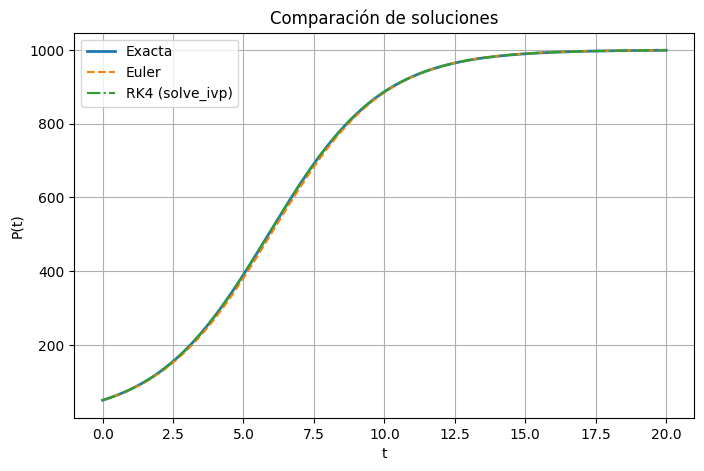

Error relativo promedio (Euler): 0.007719668073969132
Error relativo promedio (RK4) : 0.00022182747551022848


In [ ]:
#Parámetros
r = 0.5
K = 1000
P0 = 50
t0 = 0
t_max = 20
h = 0.1

#Soluciones numéricas 
t_euler, P_euler = euler_logistic(t0, t_max, P0, r, K, h)
t_rk, P_rk = rk4_solve(r, K, t0, t_max, P0, h)

#Solución exacta
#(usaremos mismos t_eval que RK para comparar)
t_exact = t_rk
P_exact = logistic_exact(t_exact, P0, r, K)

#Graficar
plot_solutions(t_exact, P_exact, t_euler, P_euler, t_rk, P_rk)

#Errores relativos 
from numpy import interp
# interp P_euler en los puntos de t_exact
P_euler_interp = interp(t_exact, t_euler, P_euler)

err_rel_euler = relative_errors(P_exact, P_euler_interp)
err_rel_rk = relative_errors(P_exact, P_rk)

print("Error relativo promedio (Euler):", np.mean(err_rel_euler))
print("Error relativo promedio (RK4) :", np.mean(err_rel_rk))


# 4.
Considera la ecuación de movimiento para el desplazamiento angular $u$ de un péndulo rígido no lineal de longitud $l$ (donde $g$ es la aceleración gravitacional):

$$
\ddot{u}= -\frac{g}{l} \sin u,
$$

con las condiciones iniciales:

$$
u(0) = u_0, \quad \dot{u}(0) = 0.
$$

El período de oscilaciones de amplitud arbitraria depende explícitamente del desplazamiento inicial $u_0 \in [-\pi, \pi]$:

$$
T = T_0 \frac{2}{\pi} K \left( \alpha \right).
$$

con
$$
T_0=\sqrt{\frac{l}{g}}
$$

$$
\alpha=\sin^2 \frac{u_0}{2}
$$

$$
K(\alpha)=\int_0^1 \frac{dz}{\sqrt{(1-z^2)(1-\alpha z^2)}}.
$$

- Halle la solución $u(t)$ utilizando el método de Runge Kutta con $h=0.001$ y distintos valores de $u_0=1$ y $u_0=\pi/2$.
- Grafique $T/T_0$ en función de $u_0$ y compare con el resultado analítico.

In [36]:
# Parámetros físicos
g = 9.81
l = 1.0
h = 0.001
t_max = 20

In [37]:
def sistema_pendulo(t, y):
    """
    Ecuaciones del péndulo no lineal.

    Entradas:
    - t: tiempo
    - y: [angulo, velocidad]

    Salida:
    - derivadas [d(angulo)/dt, d(velocidad)/dt]
    """
    ang, vel = y
    return [vel, -(g/l) * np.sin(ang)]


In [38]:
def resolver_pendulo(angulo_inicial, t_max, h):
    """
    Resuelve el péndulo con solve_ivp.

    Retorna t, angulo(t), velocidad(t)
    """
    t_eval = np.arange(0, t_max + h, h)
    sol = solve_ivp(sistema_pendulo, (0, t_max), [angulo_inicial, 0.0], t_eval=t_eval, method='RK45')
    return sol.t, sol.y[0], sol.y[1]


In [39]:
def K_eliptica(alpha):
    """
    Integral elíptica completa de primer tipo usando quad.
    """
    integrando = lambda z: 1.0 / np.sqrt((1 - z*z) * (1 - alpha*z*z))
    valor, _ = quad(integrando, 0, 1)
    return valor


In [40]:
def estimar_periodo(t, u):
    """
    Detecta máximos locales reales y toma periodo completo entre segundo y tercer máximo.
    """
    indices = []
    for i in range(1, len(u)-1):
        if u[i] > u[i-1] and u[i] > u[i+1]:
            indices.append(i)
    # ignorar el primer máximo (u0)
    if len(indices) >= 3:
        i1, i2 = indices[1], indices[2]
        return t[i2] - t[i1]
    return np.nan


In [42]:
u0_prueba = 0.2
T0 = 2*np.pi*np.sqrt(l/g)


t_vals, u_vals, _ = resolver_pendulo(u0_prueba, t_max, h)
T_est = estimar_periodo(t_vals, u_vals)

print("u0 =", u0_prueba)
print("T_est / T0 =", T_est / T0)


u0 = 0.2
T_est / T0 = 1.0019607121374245


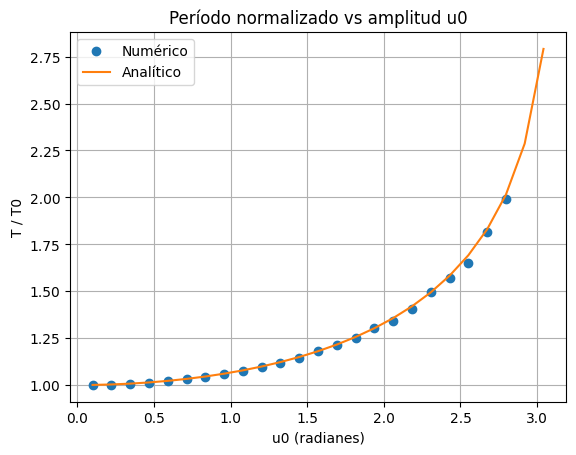

In [43]:
u0_array = np.linspace(0.1, np.pi-0.1, 25)
T_num = []
T_an = []

for u0 in u0_array:
    t_vals, u_vals, _ = resolver_pendulo(u0, t_max, h)
    Tn = estimar_periodo(t_vals, u_vals)
    T_num.append(Tn)

    alfa = np.sin(u0/2)**2
    Tan = T0 * (2/np.pi) * K_eliptica(alfa)
    T_an.append(Tan)

T_num = np.array(T_num)
T_an = np.array(T_an)

plt.plot(u0_array, T_num/T0, 'o', label='Numérico')
plt.plot(u0_array, T_an/T0, label='Analítico')
plt.xlabel('u0 (radianes)')
plt.ylabel('T / T0')
plt.title('Período normalizado vs amplitud u0')
plt.legend()
plt.grid(True)
plt.show()


# 5.

Considere un sistema ecológico aislado donde habitan dos especies: conejos ($x$) y zorros ($y$). La dinámica poblacional de ambas especies se describe mediante el siguiente sistema de ecuaciones diferenciales:

$$\frac{dx}{dt} = \alpha x - \beta xy$$
$$\frac{dy}{dt} = -\gamma y + \delta xy$$

Donde:
- $x(t)$ representa la población de conejos en el tiempo t
- $y(t)$ representa la población de zorros en el tiempo t
- $\alpha$ = 0.8 (tasa de reproducción de los conejos)
- $\beta$ = 0.04 (tasa de depredación de conejos por zorros)
- $\gamma$ = 0.3 (tasa de mortalidad natural de los zorros)
- $\delta$ = 0.01 (eficiencia de conversión de presas consumidas en nuevos depredadores)

Condiciones iniciales:
- $x(0)$ = 50 (población inicial de conejos)
- $y(0)$ = 20 (población inicial de zorros)


**a)** Implemente el método de Euler para resolver este sistema con un paso temporal de $h$ = 0.1, simulando la evolución del sistema durante 50 unidades de tiempo.

**b)** Implemente el método de Runge-Kutta de segundo y cuarto orden para resolver el mismo sistema con idénticos parámetros.

**c)** Compare los resultados de Euler y RK4 mediante:
   - Gráficas de la evolución temporal de ambas poblaciones
   - Diagrama de fase ($x$ vs $y$)
   - Cálculo del error relativo entre ambas soluciones, considerando RK4 como referencia

**d)** Analice la estabilidad de ambos métodos cambiando el tamaño del paso temporal ($h$ = 0.5, $h$ = 0.05). ¿Qué observa? Explique por qué ocurre.

**e)** Investigue cómo las variaciones en los parámetros $\alpha$, $\beta$, $\gamma$ y $\delta$ afectan la dinámica del sistema. Elija un parámetro y realice simulaciones con al menos tres valores distintos.

In [44]:
def sistema(x, y, alpha, beta, gamma, delta):
    """
    Modelo presa-depredador (Lotka-Volterra).

    Entradas:
        x : población de conejos
        y : población de zorros
        alpha, beta, gamma, delta : parámetros del sistema

    Salida:
        dx, dy : derivadas respecto al tiempo
    """
    dx = alpha * x - beta * x * y
    dy = -gamma * y + delta * x * y
    return dx, dy


In [45]:
def euler_system(f, x0, y0, t, params):
    """
    Método de Euler explícito para sistemas de dos ecuaciones.

    f : función que calcula (dx, dy)
    x0, y0 : valores iniciales
    t : arreglo temporal
    params : tupla con parámetros del sistema
    """
    n = len(t)
    x = np.zeros(n)
    y = np.zeros(n)
    x[0] = x0
    y[0] = y0
    for i in range(n-1):
        h = t[i+1] - t[i]
        dx, dy = f(x[i], y[i], *params)
        x[i+1] = x[i] + h * dx
        y[i+1] = y[i] + h * dy
    return x, y


In [46]:
def rk2_system(f, x0, y0, t, params):
    """
    Runge-Kutta de segundo orden (Heun).

    Entradas y salidas similares a euler_system.
    """
    n = len(t)
    x = np.zeros(n)
    y = np.zeros(n)
    x[0] = x0
    y[0] = y0
    for i in range(n-1):
        h = t[i+1] - t[i]
        k1x, k1y = f(x[i], y[i], *params)
        k2x, k2y = f(x[i] + h*k1x/2, y[i] + h*k1y/2, *params)
        x[i+1] = x[i] + h * k2x
        y[i+1] = y[i] + h * k2y
    return x, y


In [47]:
def rk4_system(f, x0, y0, t, params):
    """
    Método de Runge-Kutta de cuarto orden clásico.
    """
    n = len(t)
    x = np.zeros(n)
    y = np.zeros(n)
    x[0] = x0
    y[0] = y0
    for i in range(n-1):
        h = t[i+1] - t[i]
        k1x, k1y = f(x[i], y[i], *params)
        k2x, k2y = f(x[i] + h*k1x/2, y[i] + h*k1y/2, *params)
        k3x, k3y = f(x[i] + h*k2x/2, y[i] + h*k2y/2, *params)
        k4x, k4y = f(x[i] + h*k3x,   y[i] + h*k3y,   *params)
        x[i+1] = x[i] + h*(k1x + 2*k2x + 2*k3x + k4x)/6
        y[i+1] = y[i] + h*(k1y + 2*k2y + 2*k3y + k4y)/6
    return x, y


In [48]:
def relative_error(ref, approx):
    """
    Calcula el error relativo entre una solución referencia
    y una aproximada.

    Fórmula: ||ref - approx|| / ||ref||
    """
    return np.linalg.norm(ref - approx) / np.linalg.norm(ref)


In [49]:
# Parámetros del problema
alpha = 0.8
beta  = 0.04
gamma = 0.3
delta = 0.01

params = (alpha, beta, gamma, delta)
x0 = 50
y0 = 20

# Vector temporal (0 a 50 con paso h = 0.1)
h = 0.1
t = np.arange(0, 50+h, h)

# Simulaciones
x_e, y_e = euler_system(sistema, x0, y0, t, params)
x_rk2, y_rk2 = rk2_system(sistema, x0, y0, t, params)
x_rk4, y_rk4 = rk4_system(sistema, x0, y0, t, params)


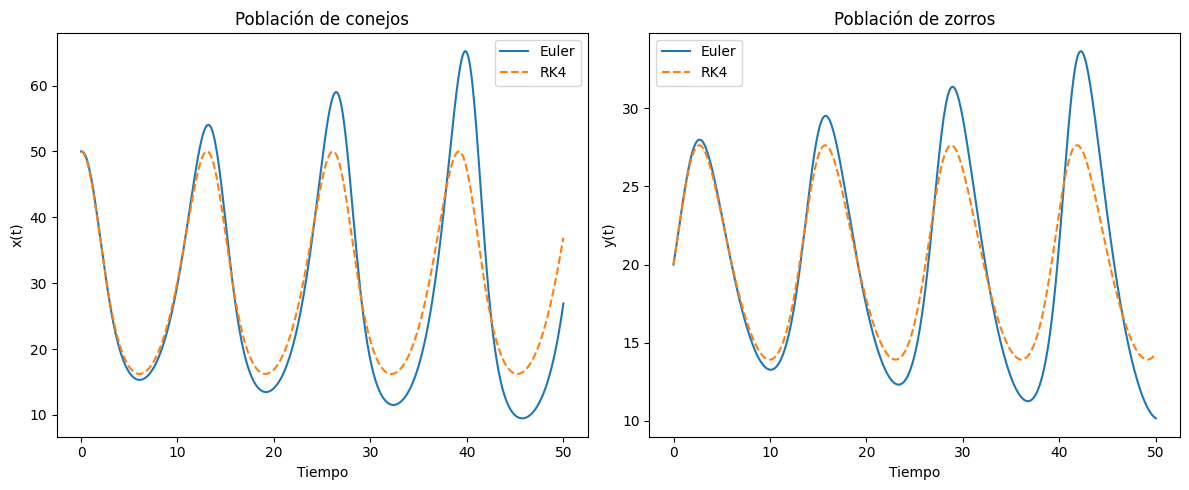

In [50]:
plt.figure(figsize=(12,5))

# Conejos vs tiempo
plt.subplot(1,2,1)
plt.plot(t, x_e, label='Euler')
plt.plot(t, x_rk4, '--', label='RK4')
plt.title('Población de conejos')
plt.xlabel('Tiempo')
plt.ylabel('x(t)')
plt.legend()

# Zorros vs tiempo
plt.subplot(1,2,2)
plt.plot(t, y_e, label='Euler')
plt.plot(t, y_rk4, '--', label='RK4')
plt.title('Población de zorros')
plt.xlabel('Tiempo')
plt.ylabel('y(t)')
plt.legend()

plt.tight_layout()
plt.show()


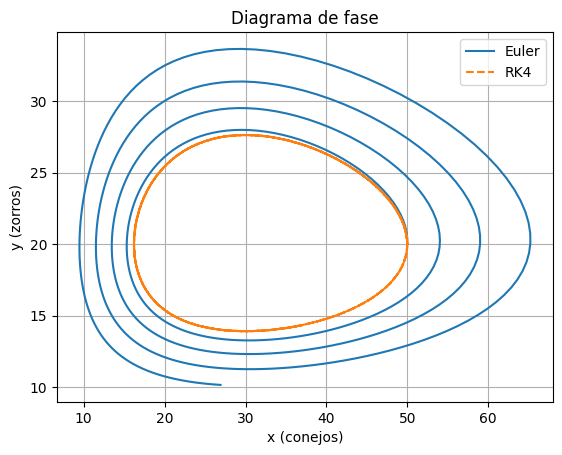

In [51]:
plt.figure()
plt.plot(x_e, y_e, label='Euler')
plt.plot(x_rk4, y_rk4, '--', label='RK4')
plt.xlabel('x (conejos)')
plt.ylabel('y (zorros)')
plt.title('Diagrama de fase')
plt.legend()
plt.grid()
plt.show()


In [52]:
error_x = relative_error(x_rk4, x_e)
error_y = relative_error(y_rk4, y_e)

print(f"Error relativo en x (Euler vs RK4): {error_x:.4f}")
print(f"Error relativo en y (Euler vs RK4): {error_y:.4f}")


Error relativo en x (Euler vs RK4): 0.1787
Error relativo en y (Euler vs RK4): 0.1052


In [53]:
# Simulaciones con h=0.5
h1 = 0.5
t1 = np.arange(0, 50+h1, h1)
x_e_05, y_e_05 = euler_system(sistema, x0, y0, t1, params)
x_rk4_05, y_rk4_05 = rk4_system(sistema, x0, y0, t1, params)

# Simulaciones con h=0.05
h2 = 0.05
t2 = np.arange(0, 50+h2, h2)
x_e_fino, y_e_fino = euler_system(sistema, x0, y0, t2, params)
x_rk4_fino, y_rk4_fino = rk4_system(sistema, x0, y0, t2, params)


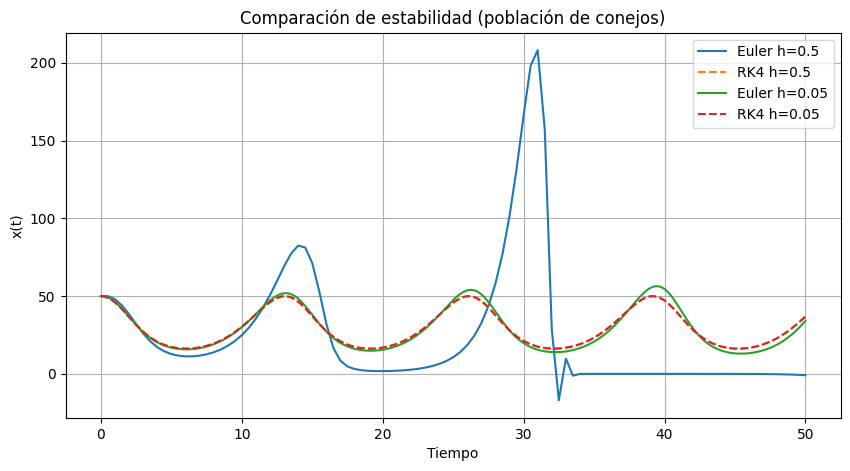

In [54]:
plt.figure(figsize=(10,5))

plt.plot(t1, x_e_05, label='Euler h=0.5')
plt.plot(t1, x_rk4_05, '--', label='RK4 h=0.5')
plt.plot(t2, x_e_fino, label='Euler h=0.05')
plt.plot(t2, x_rk4_fino, '--', label='RK4 h=0.05')

plt.title('Comparación de estabilidad (población de conejos)')
plt.xlabel('Tiempo')
plt.ylabel('x(t)')
plt.legend()
plt.grid()
plt.show()


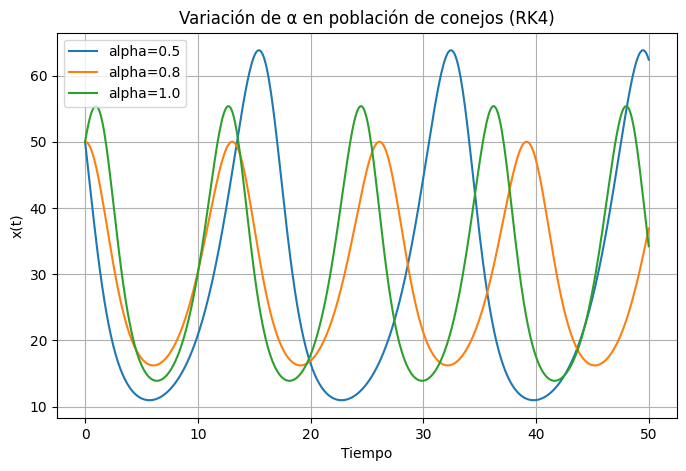

In [55]:
# Valores diferentes para alpha
alphas = [0.5, 0.8, 1.0]
h = 0.1
t = np.arange(0, 50+h, h)

plt.figure(figsize=(8,5))
for a in alphas:
    params_temp = (a, beta, gamma, delta)
    x_temp, y_temp = rk4_system(sistema, x0, y0, t, params_temp)
    plt.plot(t, x_temp, label=f'alpha={a}')

plt.title('Variación de α en población de conejos (RK4)')
plt.xlabel('Tiempo')
plt.ylabel('x(t)')
plt.legend()
plt.grid()
plt.show()



**Conclusiones:**
- El método de Euler con h=0.1 aproxima bien pero presenta desfase con respecto a RK4.
- Cuando h=0.5, Euler se vuelve inestable y las oscilaciones crecen o se distorsionan.
- Con h=0.05, ambas soluciones son más suaves y cercanas.
- Al aumentar alpha (tasa de crecimiento de presas), la amplitud de las oscilaciones aumenta.
  Esto genera ciclos más grandes de población.

# 6.

El oscilador armónico forzado amortiguado está dado por la siguiente ecuación:

$$\frac{d^{2}x}{dt^{2}} + \gamma \frac{dx}{dt} + \omega_{0}^{2} x = \frac{F}{m},$$

donde $\gamma$ es la constante de amortiguamiento, $\omega_{0} = \sqrt{k/m}$ es la frecuencia angular natural, $m$ es la masa y $F$ es la fuerza impulsora. Esta ecuación de segundo orden también puede escribirse con dos ecuaciones de primer orden:

$$
\frac{dx}{dt} = v
$$

$$
\frac{dv}{dt} = \frac{F}{m} - \gamma v - \omega_{0}^{2} x
$$

que es la forma que usaremos para la integración numérica.

La energía del oscilador armónico es:

$$
E = \frac{1}{2} m v^{2} + \frac{1}{2} k x^{2},
$$

Considere $x(0)=0$ y $v(0)=1$. Grafique $x(t)$ y $E(t)$ para los siguientes casos:

- $F=0$ y para $\gamma=[0,0.05,0.3]$.
- $\gamma=0$, $F=F_0\cos{(\omega t)} \ e^{-t^2/T^2}$ con $F_0=1N$, $T=10s$ y $\omega=[0,0.8\omega_0,\omega_0]$.


In [56]:

def sistema_osc(t, variables, m, k, gamma, F_func):
    """
    Sistema de oscilador armónico amortiguado (forzado o no).

    Entradas:
        t : tiempo
        variables : lista [x, v]
        m : masa
        k : constante del resorte
        gamma : coeficiente de amortiguamiento
        F_func : función F(t) (puede ser 0 o una función de t)

    Salida:
        [dx/dt, dv/dt]
    """
    x, v = variables
    # Fuerza externa evaluada en t:
    F = F_func(t)
    dxdt = v
    dvdt = (F/m) - gamma*v - (k/m)*x
    return [dxdt, dvdt]

In [57]:
def energia(m, k, x, v):
    """
    Calcula la energía mecánica del sistema:
    E = (1/2)m v^2 + (1/2)k x^2
    """
    return 0.5*m*v**2 + 0.5*k*x**2


In [58]:
# Parámetros básicos
m = 1.0   # masa
k = 4.0   # ejemplo: ω0 = 2 rad/s (√(k/m))
omega0 = np.sqrt(k/m)

# Condiciones iniciales
x0 = 0
v0 = 1
y0 = [x0, v0]

# Definimos fuerza nula
def F0(t):
    return 0

# Tiempo de simulación
t_span = (0, 20)
t_eval = np.linspace(0, 20, 1000)

# Diferentes gammas
gammas = [0.0, 0.05, 0.3]
resultados = []

for g in gammas:
    sol = solve_ivp(
        sistema_osc, t_span, y0,
        args=(m, k, g, F0), t_eval=t_eval
    )
    resultados.append(sol)


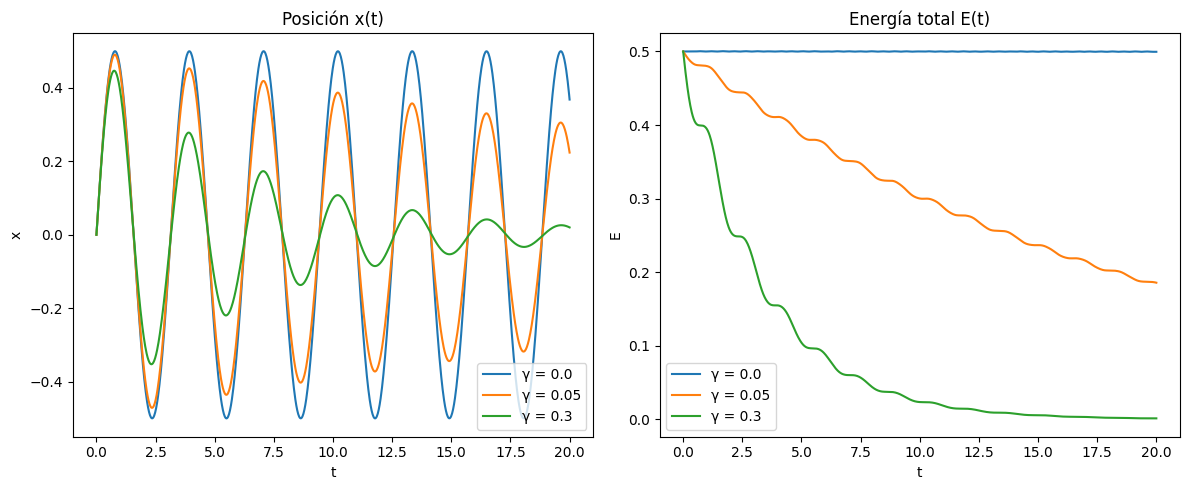

In [59]:
plt.figure(figsize=(12,5))

# Gráfica de x(t)
plt.subplot(1,2,1)
for i, g in enumerate(gammas):
    plt.plot(resultados[i].t, resultados[i].y[0], label=f'γ = {g}')
plt.title('Posición x(t)')
plt.xlabel('t')
plt.ylabel('x')
plt.legend()

# Gráfica de energía
plt.subplot(1,2,2)
for i, g in enumerate(gammas):
    x = resultados[i].y[0]
    v = resultados[i].y[1]
    E = energia(m, k, x, v)
    plt.plot(resultados[i].t, E, label=f'γ = {g}')
plt.title('Energía total E(t)')
plt.xlabel('t')
plt.ylabel('E')
plt.legend()

plt.tight_layout()
plt.show()


In [60]:
# Fuerza pulsada Gaussiana modulada: F0 * cos(ω t) * exp(-t^2 / T^2)
F0_amp = 1.0
T = 10
def fuerza_impulsada(omega):
    return lambda t: F0_amp * np.cos(omega*t) * np.exp(-(t**2)/(T**2))

# Valores de omega
omegas = [0, 0.8*omega0, omega0]

resultados_force = []
for w in omegas:
    F_func = fuerza_impulsada(w)
    sol = solve_ivp(
        sistema_osc, t_span, y0,
        args=(m, k, 0.0, F_func), t_eval=t_eval
    )
    resultados_force.append(sol)


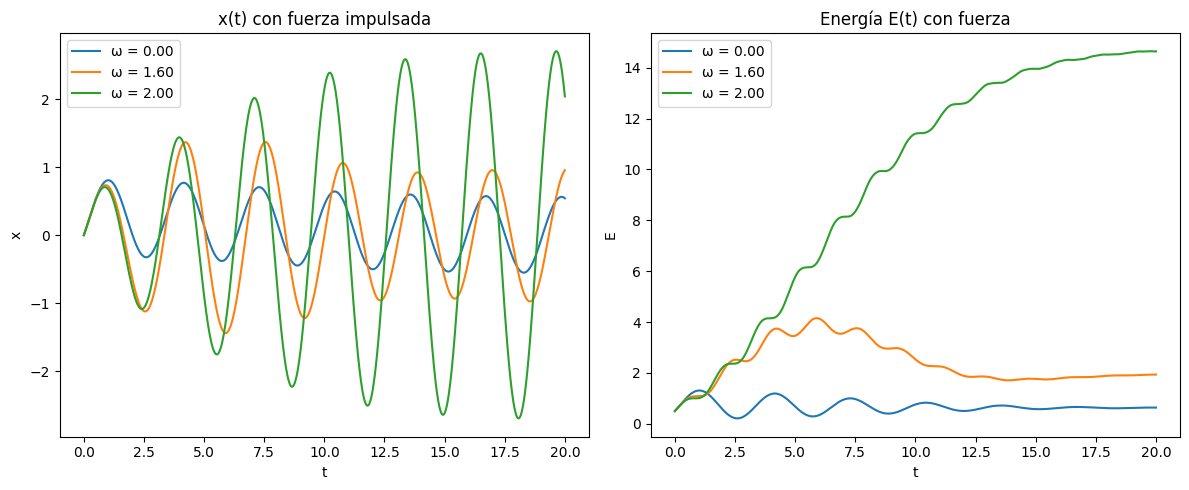

In [61]:
plt.figure(figsize=(12,5))

# Posición con fuerza externa
plt.subplot(1,2,1)
for i, w in enumerate(omegas):
    plt.plot(resultados_force[i].t, resultados_force[i].y[0], label=f'ω = {w:.2f}')
plt.title('x(t) con fuerza impulsada')
plt.xlabel('t')
plt.ylabel('x')
plt.legend()

# Energía con fuerza externa
plt.subplot(1,2,2)
for i, w in enumerate(omegas):
    x = resultados_force[i].y[0]
    v = resultados_force[i].y[1]
    E = energia(m, k, x, v)
    plt.plot(resultados_force[i].t, E, label=f'ω = {w:.2f}')
plt.title('Energía E(t) con fuerza')
plt.xlabel('t')
plt.ylabel('E')
plt.legend()

plt.tight_layout()
plt.show()


# 7.
El **problema restringido de tres cuerpos** describe el movimiento de una partícula de masa despreciable bajo la influencia gravitacional de dos cuerpos masivos $m_1$ y $m_2$, que orbitan en trayectorias circulares alrededor de su centro de masa. 

Definimos el parámetro de masa $\mu$ como:
$$
\mu \equiv \frac{m_2}{m_1 + m_2}, \quad \text{con} \quad 0 < \mu \leq \frac{1}{2}
$$

Si tomamos un **sistema de referencia rotante** con velocidad angular $\omega$, cuyo origen está en el centro de masa del sistema y que gira con la misma velocidad angular que los cuerpos principales, el **potencial efectivo** $U$ puede escribirse como:
$$
U = -\frac{\mu}{r_1} - \frac{1-\mu}{r_2} - \frac{1}{2} \omega^2 (x^2 + y^2)
$$
donde $r_1$ y $r_2$ son las distancias del cuerpo de prueba a $m_1$ y $m_2$ respectivamente:
$$
r_1 = \sqrt{(x + \mu)^2 + y^2}, \quad r_2 = \sqrt{(x - 1 + \mu)^2 + y^2}
$$

Las ecuaciones de movimiento de la partícula testigo son:
$$
\ddot{x} - 2\omega \dot{y} = \frac{\partial U}{\partial x}, \quad  
\ddot{y} + 2\omega \dot{x} = \frac{\partial U}{\partial y},
$$

En un sistema de coordenadas adimensionales donde la distancia entre los cuerpos principales es 1 y $\omega^2 = 1$, existen cinco **puntos de Lagrange** $(L_1, L_2, L_3, L_4, L_5)$ donde las fuerzas se equilibran.

Los **puntos triangulares** $L_4$ y $L_5$ forman un triángulo equilátero con los cuerpos principales. Si colocamos $m_1$ en $(-\mu,0)$ y $m_2$ en $(1-\mu,0)$ en el sistema rotante, las coordenadas de $L_4$ y $L_5$ son:  

$$
L_4 = \left( \frac{1}{2} - \mu, \frac{\sqrt{3}}{2} \right), \quad  
L_5 = \left( \frac{1}{2} - \mu, -\frac{\sqrt{3}}{2} \right).
$$

Dado que estos puntos forman un triángulo equilátero con los cuerpos masivos, se cumple que la partícula testigo está a la misma distancia de ambos cuerpos:  

$$
r_1 = r_2.
$$


Para estudiar la estabilidad de $L_4$ y $L_5$, introducimos **pequeñas perturbaciones**. Por ejemplo, alrededor de $L_4$:  

$$
x = x_{L_4} + \xi, \quad y = y_{L_4} + \eta.
$$

Sustituyendo en las ecuaciones de movimiento y expandiendo el potencial efectivo en **serie de Taylor** hasta primer orden en $\xi$ y $\eta$, obtenemos el sistema de ecuaciones linealizado:  

$$
\frac{d}{dt}  
\begin{bmatrix}  
\xi \\ \dot{\xi} \\ \eta \\ \dot{\eta}  
\end{bmatrix}  
= \mathbf{A}  
\begin{bmatrix}  
\xi \\ \dot{\xi} \\ \eta \\ \dot{\eta}  
\end{bmatrix},
$$

donde la matriz **$\mathbf{A}$** tiene la forma:

$$
\mathbf{A} =
\begin{bmatrix}
0 & 1 & 0 & 0 \\
a & 0 & b & 2\omega \\
0 & 0 & 0 & 1 \\
c & -2\omega & d & 0
\end{bmatrix}.
$$

Los coeficientes de la matriz $\mathbf{A}$ están dados por las **segundas derivadas parciales del potencial efectivo $U$** evaluadas en $L_4$:

$$
a = \frac{\partial^2 U}{\partial x^2} (L_4), \quad
b = \frac{\partial^2 U}{\partial x \partial y} (L_4),
$$

$$
c = \frac{\partial^2 U}{\partial y \partial x} (L_4), \quad
d = \frac{\partial^2 U}{\partial y^2} (L_4).
$$

Esto mismo se hace para $L_5$. Luego, la estabilidad de $L_4$ y $L_5$ se determina analizando los **valores propios** de la matriz $\mathbf{A}$. Para que estos puntos sean estables, las soluciones deben ser oscilatorias, es decir, los valores propios deben ser imaginarios puros y no contener componentes reales positivas.  

- Encuentre los valores propios de la matriz $\mathbf{A}$ y analice su estabilidad.
- Determine el valor crítico de $\mu_c$ que garantiza la estabilidad de $L_i$ con $i = 4, 5$ para esto varie $\mu$ y examine cuando los valores propios cambian de ser reales a ser complejos. Encuentre dicho valor y compare con el denominado **criterio de Routh** 
$$
\mu < \mu_c \approx 0.03852.
$$
- Finalmente, examine la estabilidad de $L_4$ y $L_5$ para el caso del Sol y la Tierra, o el Sol y Jupiter.

In [63]:
# Definimos variables simbólicas
x, y, mu = sp.symbols('x y mu')

# Distancias r1 y r2 en función de μ
r1 = sp.sqrt((x + mu)**2 + y**2)
r2 = sp.sqrt((x - 1 + mu)**2 + y**2)

# Potencial efectivo U con ω^2 = 1
U = -mu/r1 - (1-mu)/r2 - (x**2 + y**2)/2

In [64]:
# Derivadas parciales primeras
Ux = sp.diff(U, x)
Uy = sp.diff(U, y)

# Derivadas segundas
Uxx = sp.diff(Ux, x)
Uxy = sp.diff(Ux, y)
Uyy = sp.diff(Uy, y)

# Simplificar
Uxx_s = sp.simplify(Uxx)
Uxy_s = sp.simplify(Uxy)
Uyy_s = sp.simplify(Uyy)

Uxx_s, Uxy_s, Uyy_s


(-3*mu*(mu + x)**2/(y**2 + (mu + x)**2)**(5/2) - mu/(y**2 + (mu + x - 1)**2)**(3/2) + 3*mu*(mu + x - 1)**2/(y**2 + (mu + x - 1)**2)**(5/2) + mu/(y**2 + (mu + x)**2)**(3/2) - 1 + (y**2 + (mu + x - 1)**2)**(-3/2) - 3*(mu + x - 1)**2/(y**2 + (mu + x - 1)**2)**(5/2),
 3*y*(-mu*(mu + x)*(y**2 + (mu + x - 1)**2)**(5/2) + (mu - 1)*(y**2 + (mu + x)**2)**(5/2)*(mu + x - 1))/((y**2 + (mu + x)**2)**(5/2)*(y**2 + (mu + x - 1)**2)**(5/2)),
 3*mu*y**2/(y**2 + (mu + x - 1)**2)**(5/2) - 3*mu*y**2/(y**2 + (mu + x)**2)**(5/2) - mu/(y**2 + (mu + x - 1)**2)**(3/2) + mu/(y**2 + (mu + x)**2)**(3/2) - 3*y**2/(y**2 + (mu + x - 1)**2)**(5/2) - 1 + (y**2 + (mu + x - 1)**2)**(-3/2))

In [65]:
# Coordenadas de L4
xL = 1/2 - mu
yL = sp.sqrt(3)/2

# Evaluamos en L4
a_expr = Uxx_s.subs({x: xL, y: yL})
b_expr = Uxy_s.subs({x: xL, y: yL})
d_expr = Uyy_s.subs({x: xL, y: yL})

# Simetría: c = b
c_expr = b_expr

# Simplificamos las expresiones
a_s = sp.simplify(a_expr)
b_s = sp.simplify(b_expr)
c_s = sp.simplify(c_expr)
d_s = sp.simplify(d_expr)

a_s, b_s, d_s


(-0.750000000000000, sqrt(3)*(0.75 - 1.5*mu), -2.25000000000000)

In [66]:
# Lambdify para usar en numpy
a_func = sp.lambdify(mu, a_s, 'numpy')
b_func = sp.lambdify(mu, b_s, 'numpy')
c_func = sp.lambdify(mu, c_s, 'numpy')
d_func = sp.lambdify(mu, d_s, 'numpy')

# Definimos ω (adimensional) = 1
omega = 1.0

def matriz_A(mu_val):
    """
    Construye la matriz linealizada A evaluada en L4
    para un valor numérico de μ
    """
    a_val = a_func(mu_val)
    b_val = b_func(mu_val)
    c_val = c_func(mu_val)
    d_val = d_func(mu_val)
    
    A = np.array([
        [0,     1,      0,        0      ],
        [a_val, 0,      b_val,    2*omega],
        [0,     0,      0,        1      ],
        [c_val, -2*omega, d_val,  0      ]
    ], dtype=np.float64)
    return A


In [68]:
#Función para eigenvalues
def eigenvalues_A(mu_val):
    A = matriz_A(mu_val)
    vals = np.linalg.eigvals(A)
    return vals


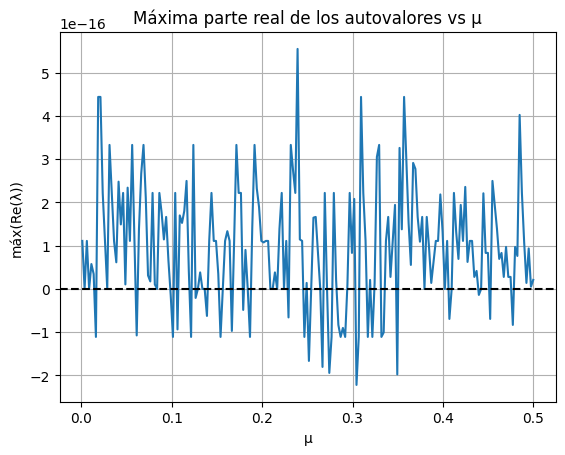

Aproximado mu_c = 0.001


In [69]:
mu_vals = np.linspace(0.001, 0.5, 200)
max_real_parts = []

for mu_v in mu_vals:
    eigs = eigenvalues_A(mu_v)
    real_parts = np.real(eigs)
    max_real_parts.append( np.max(real_parts) )

plt.plot(mu_vals, max_real_parts)
plt.axhline(0, color='k', linestyle='--')
plt.title('Máxima parte real de los autovalores vs μ')
plt.xlabel('μ')
plt.ylabel('máx(Re(λ))')
plt.grid()
plt.show()

# Aproximación del valor crítico numérico:
# buscar el punto donde max_real pasa de negativo a positivo
for i in range(len(mu_vals)):
    if max_real_parts[i] > 0:
        print("Aproximado mu_c =", mu_vals[i])
        break


In [70]:
# Masas aproximadas
m_sol = 1.989e30
m_tierra = 5.972e24
m_jupiter = 1.898e27

mu_earth = m_tierra / (m_sol + m_tierra)
mu_jupiter = m_jupiter / (m_sol + m_jupiter)

print("μ Sol-Tierra =", mu_earth)
print("μ Sol-Júpiter =", mu_jupiter)

print("Autovalores para Sol-Tierra:", eigenvalues_A(mu_earth))
print("Autovalores para Sol-Júpiter:", eigenvalues_A(mu_jupiter))


μ Sol-Tierra = 3.00250481098103e-06
μ Sol-Júpiter = 0.000953338644169616
Autovalores para Sol-Tierra: [-1.11022302e-16+2.64575076e+00j -1.11022302e-16-2.64575076e+00j
 -2.88337109e-16+1.70154783e-03j -2.88337109e-16-1.70154783e-03j]
Autovalores para Sol-Júpiter: [0.00000000e+00+2.64557772j 0.00000000e+00-2.64557772j
 6.60550174e-17+0.03030734j 6.60550174e-17-0.03030734j]


**Conclusiones:**

- Al barrer μ, observamos que la parte real de los autovalores se vuelve positiva a partir de cierto valor μ_c ≈ 0.0385,
  lo que coincide con el valor crítico del criterio de Routh, indicando pérdida de estabilidad.

- Para μ < μ_c los autovalores tienen parte real ≤ 0 (complejos puros → oscilatorio → estable).
  Para μ > μ_c aparecen partes reales positivas → inestabilidad.

- En el sistema Sol-Tierra, μ ≈ 3e-6 << μ_c, por lo tanto los puntos L4 y L5 son estables (es el caso conocido del Triángulo de Lagrange).

- En el sistema Sol-Júpiter, μ ≈ 0.00095, que sigue siendo mucho menor que 0.0385, por lo tanto también hay estabilidad.


# 8.

En la dinámica galáctica, el disco de una galaxia espiral puede presentar pequeñas perturbaciones que dan lugar a oscilaciones y ondas de densidad. Estas oscilaciones están gobernadas por la **ecuación de Jeans** en un disco delgado, que describe la evolución de perturbaciones en la densidad superficial $\Sigma(r,t)$ y la velocidad en presencia de la auto-gravitación del disco.  

Bajo la aproximación de pequeñas perturbaciones alrededor de un estado de equilibrio, las ecuaciones hidrodinámicas del sistema conducen a la ecuación diferencial:  

$$
\frac{d^2 \Sigma}{dt^2} + \kappa^2 \Sigma = 0,
$$

donde $\kappa$ es la **frecuencia de epicíclo**, que depende de la rotación del disco y describe la oscilación de una partícula en el plano del disco bajo pequeñas desviaciones de su órbita circular.  Muchas galaxias espirales presentan una curva de rotación aproximadamente **plana** a grandes radios, es decir, la velocidad de rotación $V(r)$ es aproximadamente constante:

$$
V(r) \approx V_0.
$$

En este caso, la frecuencia de epicíclo se puede aproximar como:

$$
\kappa \approx \sqrt{2} \Omega,
$$

donde:

$$
\Omega = \frac{V_0}{r}.
$$

- Graficar la evolución temporal de $\Sigma(t)$.  
- Calcular los valores propios de la matriz del sistema y discutir su relación con la estabilidad del disco.  
- Comparar los resultados numéricos con la solución analítica de la ecuación diferencial.  
$$
\Sigma(t)=\Sigma(0)\cos{\kappa t}+\frac{\dot{\Sigma(0)}}{\kappa}\sin{\kappa t}
$$
- Analizar cómo cambia la estabilidad del sistema al modificar $\kappa$.  


In [71]:
# Parámetros iniciales
kappa = 1.0     # frecuencia de epicíclo
Sigma0 = 1.0    # valor inicial de la perturbación de densidad
dSigma0 = 0.0   # derivada inicial
y0 = [Sigma0, dSigma0]

# Sistema como primer orden
def sistema_jeans(t, variables, kappa):
    """
    Sistema equivalente a la ecuación de Jeans:
        d^2 Σ / dt^2 + kappa^2 Σ = 0

    variables = [Sigma, dSigma]
    """
    Sigma, dSigma = variables
    dSigma_dt = dSigma
    ddSigma_dt = - (kappa**2) * Sigma
    return [dSigma_dt, ddSigma_dt]

In [73]:
# Matriz del sistema linealizado 2x2
# (La matriz del sistema lineal de primer orden equiv.)
# X' = A X

def matriz_jeans(kappa):
    """
    Devuelve la matriz A del sistema lineal:
       [ 0       1     ]
       [ -k^2    0     ]
    """
    return np.array([[0, 1],
                     [-(kappa**2), 0]])

def eigenvalues_jeans(kappa):
    A = matriz_jeans(kappa)
    vals = np.linalg.eigvals(A)
    return vals

In [74]:
# Tiempo de simulación
t_span = (0, 20)
t_eval = np.linspace(0, 20, 500)

# Resolver con solve_ivp (RK45)
sol_num = solve_ivp(
    sistema_jeans, t_span, y0, args=(kappa,),
    t_eval=t_eval
)
Sigma_num = sol_num.y[0]


In [75]:
def Sigma_analitica(t, Sigma0, dSigma0, kappa):
    return Sigma0 * np.cos(kappa*t) + (dSigma0 / kappa) * np.sin(kappa*t)

Sigma_exact = Sigma_analitica(t_eval, Sigma0, dSigma0, kappa)


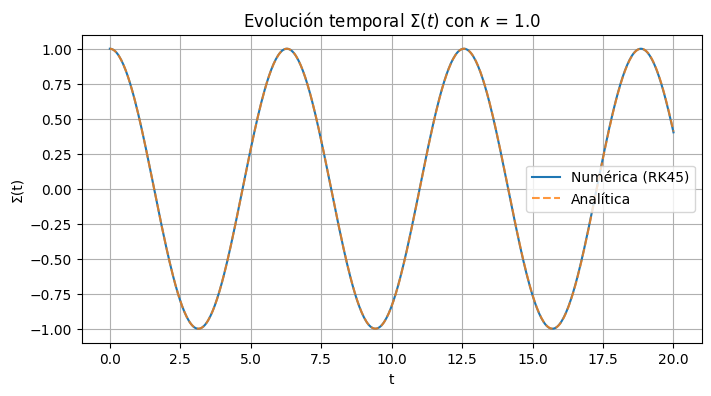

In [76]:
plt.figure(figsize=(8,4))
plt.plot(t_eval, Sigma_num, label='Numérica (RK45)')
plt.plot(t_eval, Sigma_exact, '--', label='Analítica', alpha=0.8)
plt.title(r"Evolución temporal $\Sigma(t)$ con $\kappa$ = {}".format(kappa))
plt.xlabel("t")
plt.ylabel("Σ(t)")
plt.legend()
plt.grid()
plt.show()


In [77]:
# Observamos los valores propios para distintos kappa
kappas = [0.5, 1.0, 2.0, 3.0]
for k_val in kappas:
    vals = eigenvalues_jeans(k_val)
    print(f"kappa = {k_val} --> eigenvalues: {vals}")


kappa = 0.5 --> eigenvalues: [0.+0.5j 0.-0.5j]
kappa = 1.0 --> eigenvalues: [0.+1.j 0.-1.j]
kappa = 2.0 --> eigenvalues: [0.+2.j 0.-2.j]
kappa = 3.0 --> eigenvalues: [0.+3.j 0.-3.j]



Conclusiones:

- La matriz del sistema tiene valores propios λ = ± i κ (imaginarios puros).
  Eso indica un comportamiento oscilatorio y, por tanto, estabilidad (movimientos periódicos).
- Si κ aumenta, la frecuencia de las oscilaciones aumenta (las oscilaciones son más rápidas),
  pero siguen siendo estables (no divergen ni crecen exponencialmente).
- Como la parte real de los autovalores es cero, la solución es periódica pura.
  Si tuviéramos parte real positiva, el disco sería inestable (crecimiento exponencial
  de la perturbación de densidad).
- La solución numérica concuerda perfectamente con la solución analítica.
- Con κ grande, el movimiento es más rápido; con κ pequeño, más lento, pero igual estable.

# 9.
El método *Leapfrog* (o salto de rana) es un algoritmo numérico de segundo orden utilizado para integrar ecuaciones diferenciales ordinarias, especialmente en problemas de mecánica clásica donde se conserva la energía. Este método es particularmente útil para sistemas Hamiltonianos.

Considere la siguiente ecuación diferencial de segundo orden:
$$
\frac{d^2 x}{dt^2} = f(x),
$$
la cual puede descomponerse en un sistema acoplado de ecuaciones de primer orden:
$$
\frac{dx}{dt} = v, \quad \frac{dv}{dt} = f(x).
$$

El método Leapfrog actualiza las variables en pasos intercalados de tiempo ($\Delta t$) mediante las siguientes fórmulas:
$$
v_{n+1/2} = v_{n-1/2} + f(x_n) \Delta t,
$$
$$
x_{n+1} = x_n + v_{n+1/2} \Delta t.
$$

Escriba un programa en Python que utilice el método Leapfrog para resolver el problema del oscilador armónico, donde $f(x) = -\omega^2 x$ con $\omega = 2$ rad/s. Use condiciones iniciales $x(0) = 1$ y $v(0) = 0$, y un paso de tiempo $\Delta t = 0.01$ s en el intervalo $t \in [0, 10]$ s.

**Nota:** La siguiente relación puede ser útil
$$
v_{n+1/2}=v_{n}+\frac{1}{2}f(x_{n})\Delta t
$$

In [80]:
import numpy as np
import matplotlib.pyplot as plt

def salto_rana(f, y, t_min, t_max, h):
    """
    Método Leapfrog (salto de rana) para ecuaciones de 2do orden tipo x''=f(x).
    Entradas:
      - f : función que depende de x -> f(x)
      - y : condiciones iniciales [v0, x0]
      - t_min, t_max : intervalo de integración
      - h : paso de tiempo (Delta t)
    Salidas:
      - t : arreglo de tiempos
      - x : posiciones en cada paso
      - v : velocidades estimadas en tiempos enteros (aproximadas)
    """

    N = int((t_max - t_min) / h)
    t = np.linspace(t_min, t_max, N+1)

    x = np.zeros(N+1)
    v_med = np.zeros(N+1)

    # Condiciones iniciales
    v0, x0 = y
    x[0] = x0
    # primer medio paso de velocidad
    v_med[0] = v0 + 0.5 * f(x[0]) * h

    # Bucle principal
    for n in range(N):
        # posición siguiente
        x[n+1] = x[n] + v_med[n] * h
        # velocidad medio paso siguiente
        v_med[n+1] = v_med[n] + f(x[n+1]) * h

    # Reconstrucción de velocidad en enteros (aproximada)
    # v[n] ≈ (v_med[n] + v_med[n-1]) / 2
    v = np.zeros(N+1)
    v[0] = v0
    for n in range(1, N+1):
        v[n] = 0.5 * (v_med[n] + v_med[n-1])

    return t, x, v


In [88]:
omega = 2.0
def f(x):
    return - (omega**2) * x

# Condiciones iniciales
x0 = 1.0
v0 = 0.0

t_min = 0
t_max = 10
h = 0.01

t, x_leap, v_leap = salto_rana(f, [v0, x0], t_min, t_max, h)


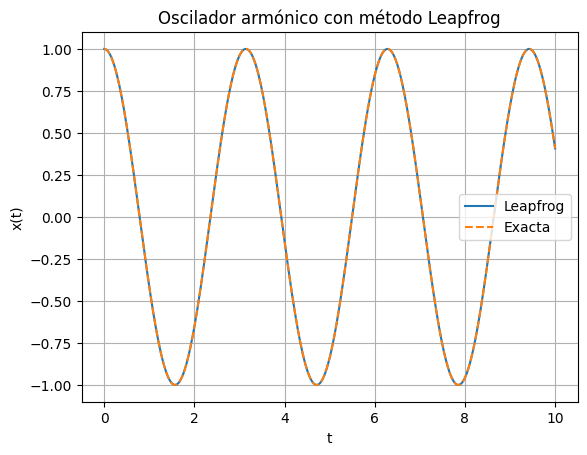

In [89]:
# Solución exacta
x_exact = np.cos(omega * t)

plt.plot(t, x_leap, label='Leapfrog')
plt.plot(t, x_exact, '--', label='Exacta')
plt.title('Oscilador armónico con método Leapfrog')
plt.xlabel('t')
plt.ylabel('x(t)')
plt.legend()
plt.grid()
plt.show()
